# To Analyze

       Whether the client has subscribed a term deposit or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

## importing dataset

In [2]:
bank_1=pd.read_csv(r"C:\Users\sagar\anaconda3\data science course related\data science assignment\logistic regression\bank-full (1).csv",delimiter=';')

# Exploratory Data Analysis(EDA)

In [3]:
bank_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
bank_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank_1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
bank_1.rename(columns={'y':'termdeposit'},inplace=True)

In [7]:
bank_1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,termdeposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'termdeposit')

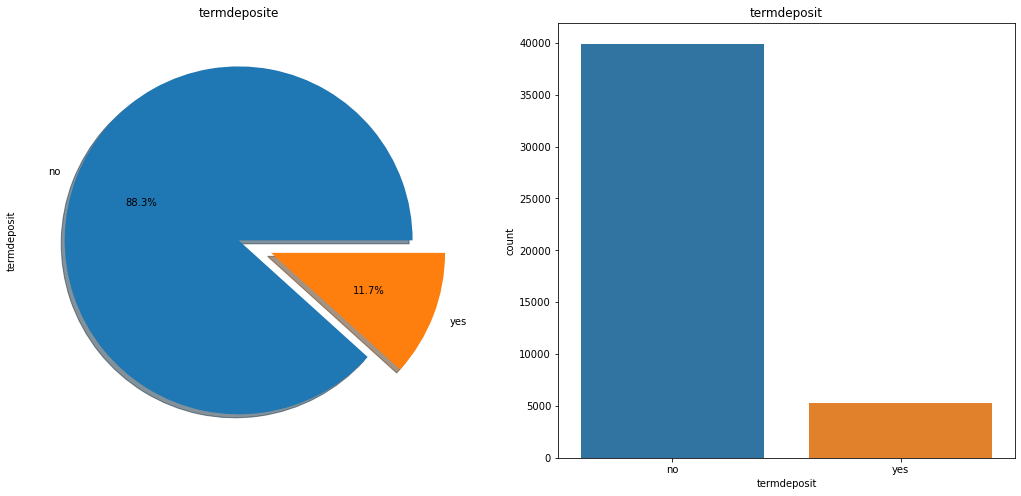

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
bank_1['termdeposit'].value_counts().plot.pie(explode=(0,0.2),autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('termdeposite')
sns.countplot('termdeposit',data=bank_1,ax=ax[1])
ax[1].set_title('termdeposit')

# percentage of clients subscribed is 11.7%

### now lets analyze the features

In [9]:

bank_1.groupby(['job','termdeposit'])['termdeposit'].count()

job            termdeposit
admin.         no             4540
               yes             631
blue-collar    no             9024
               yes             708
entrepreneur   no             1364
               yes             123
housemaid      no             1131
               yes             109
management     no             8157
               yes            1301
retired        no             1748
               yes             516
self-employed  no             1392
               yes             187
services       no             3785
               yes             369
student        no              669
               yes             269
technician     no             6757
               yes             840
unemployed     no             1101
               yes             202
unknown        no              254
               yes              34
Name: termdeposit, dtype: int64

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job', ylabel='count'>

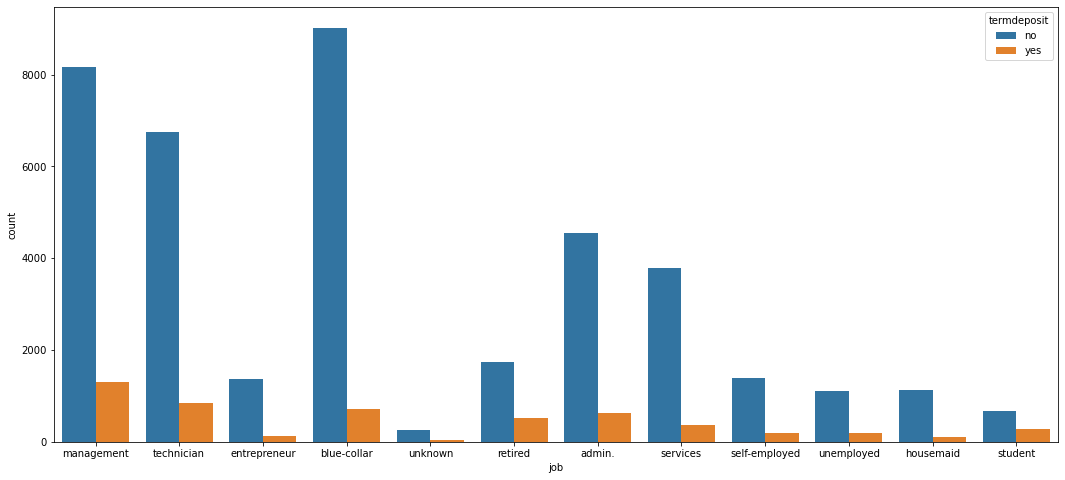

In [10]:
plt.figure(figsize=(18,8))
sns.countplot('job',hue='termdeposit',data=bank_1)

Text(0.5, 1.0, 'age')

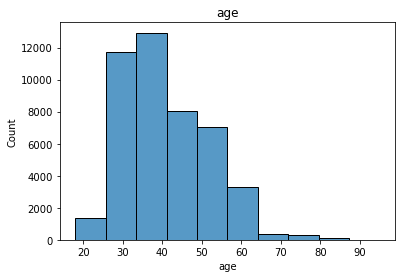

In [11]:
sns.histplot(bank_1['age'],bins=10)
plt.title('age')

In [12]:
bank_1['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'marital vs termdeposit')

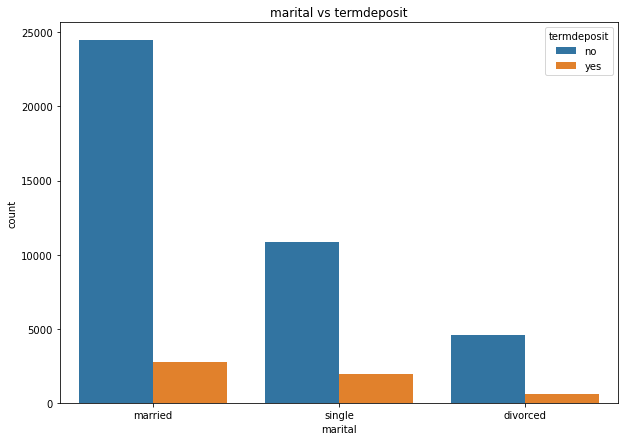

In [13]:
plt.figure(figsize=(10,7))
sns.countplot('marital',hue='termdeposit',data=bank_1)
plt.title('marital vs termdeposit')

C:\Users\sagar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'marital vs termdeposit')

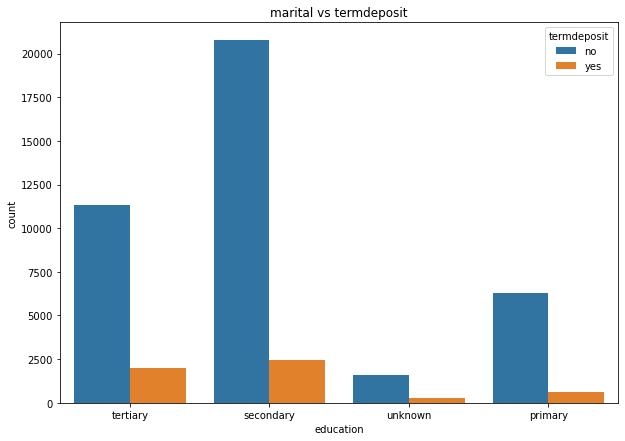

In [14]:
plt.figure(figsize=(10,7))
sns.countplot('education',hue='termdeposit',data=bank_1)
plt.title('marital vs termdeposit')

In [15]:
bank_1.groupby(['housing','loan','termdeposit']).size().reset_index()

,housing,loan,termdeposit,0
0,no,no,no,14069
1,no,no,yes,3135
2,no,yes,no,2658
3,no,yes,yes,219
4,yes,no,no,19093
5,yes,no,yes,1670
6,yes,yes,no,4102
7,yes,yes,yes,265


In [16]:
bank_1.groupby(['job','termdeposit']).size().reset_index()

,job,termdeposit,0
0,admin.,no,4540
1,admin.,yes,631
2,blue-collar,no,9024
3,blue-collar,yes,708
4,entrepreneur,no,1364
5,entrepreneur,yes,123
6,housemaid,no,1131
7,housemaid,yes,109
8,management,no,8157
9,management,yes,1301


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
bank_2=bank_1.copy()

In [19]:
bank_2.drop(['contact'],axis=1,inplace=True)

In [20]:
bank_2['month']=bank_2['month'].map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

In [21]:
bank_2['default']=bank_2['default'].map({'yes':1,'no':0})

In [22]:
bank_2['housing']=bank_2['housing'].map({'yes':1,'no':0})

In [23]:
bank_2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'termdeposit'],
      dtype='object')

In [24]:
bank_2['loan']=bank_2['loan'].map({'yes':1,'no':0})

In [25]:
bank_2

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,termdeposit
0,58,management,married,tertiary,0,2143,1,0,5,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,1,0,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,1,1,5,5,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,0,1506,1,0,5,5,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,0,1,0,0,5,5,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,17,11,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,0,1729,0,0,17,11,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,0,5715,0,0,17,11,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,0,668,0,0,17,11,508,4,-1,0,unknown,no


In [26]:
bank_2['termdeposit']=bank_2['termdeposit'].map({'yes':1,'no':0})

In [28]:
label=LabelEncoder()
bank_2['job']=label.fit_transform(bank_2['job'])

In [29]:
bank_2['marital']=label.fit_transform(bank_2['marital'])

In [30]:
bank_2['education']=label.fit_transform(bank_2['education'])

In [31]:
bank_2['poutcome']=label.fit_transform(bank_2['poutcome'])

In [32]:
bank_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          45211 non-null  int64
 1   job          45211 non-null  int32
 2   marital      45211 non-null  int32
 3   education    45211 non-null  int32
 4   default      45211 non-null  int64
 5   balance      45211 non-null  int64
 6   housing      45211 non-null  int64
 7   loan         45211 non-null  int64
 8   day          45211 non-null  int64
 9   month        45211 non-null  int64
 10  duration     45211 non-null  int64
 11  campaign     45211 non-null  int64
 12  pdays        45211 non-null  int64
 13  previous     45211 non-null  int64
 14  poutcome     45211 non-null  int32
 15  termdeposit  45211 non-null  int64
dtypes: int32(4), int64(12)
memory usage: 4.8 MB


<AxesSubplot:>

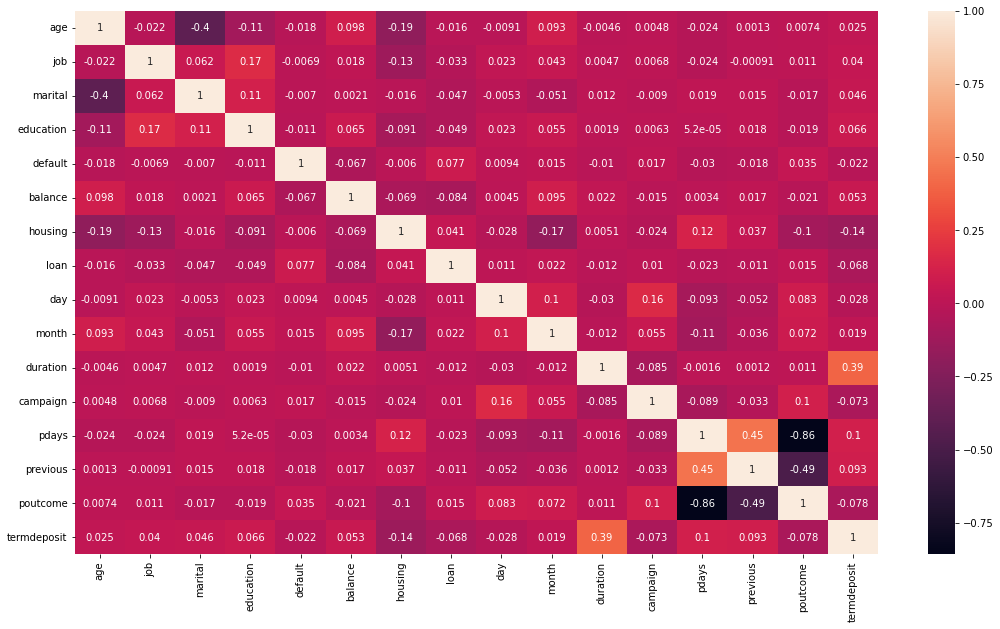

In [33]:
fig=plt.figure(figsize=(18,10))
sns.heatmap(bank_2.corr(),annot=True)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X=bank_2.loc[:,bank_2.columns != 'termdeposit']
Y=bank_2.loc[:,bank_2.columns == 'termdeposit']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [37]:
print("X_train:",X_train.shape)
print('\n',"X_test:",X_test.shape)
print('\n',"y_train:",y_train.shape)
print('\n',"y_test:",y_test.shape)

X_train: (30291, 15)

 X_test: (14920, 15)

 y_train: (30291, 1)

 y_test: (14920, 1)


In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)

In [39]:
X_test_scaled=scaler.transform(X_test)

In [40]:
classifier=LogisticRegression()
classifier.fit(X_train_scaled,y_train)

C:\Users\sagar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [41]:
y_pred=classifier.predict(X_test_scaled)

In [42]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[12910   265]
 [ 1390   355]]


In [44]:
acuracy=(12910+355)/(12910+265+1390+355)
print(acuracy)

0.8890750670241286


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     13175
           1       0.57      0.20      0.30      1745

    accuracy                           0.89     14920
   macro avg       0.74      0.59      0.62     14920
weighted avg       0.86      0.89      0.86     14920



In [49]:
classifier.predict_proba(X_test_scaled)

array([[0.96456545, 0.03543455],
       [0.91025184, 0.08974816],
       [0.9414697 , 0.0585303 ],
       ...,
       [0.94377145, 0.05622855],
       [0.83238215, 0.16761785],
       [0.71672562, 0.28327438]])

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)

In [53]:
auc

0.5916622717115315